In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

664

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=816623f54baae79d6aad1b16bbe3f882


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beringovskiy
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | tual
Processing Record 4 of Set 1 | pangnirtung
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | manokwari
Processing Record 7 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 8 of Set 1 | dingle
Processing Record 9 of Set 1 | fort nelson
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | jiddah
City not found. Skipping...
Processing Record 13 of Set 1 | ahipara
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | sept-iles
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | nizhneyansk
City not foun

Processing Record 39 of Set 4 | sinjar
Processing Record 40 of Set 4 | puerto cabezas
Processing Record 41 of Set 4 | umm lajj
Processing Record 42 of Set 4 | koumac
Processing Record 43 of Set 4 | zharkent
Processing Record 44 of Set 4 | barcelos
Processing Record 45 of Set 4 | mata
Processing Record 46 of Set 4 | usinsk
Processing Record 47 of Set 4 | bakel
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 50 of Set 4 | sioux lookout
Processing Record 1 of Set 5 | nishihara
Processing Record 2 of Set 5 | dujuma
City not found. Skipping...
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | chateaubelair
Processing Record 5 of Set 5 | duldurga
Processing Record 6 of Set 5 | hsinchu
Processing Record 7 of Set 5 | palmeiras de goias
Processing Record 8 of Set 5 | palafrugell
Processing Record 9 of Set 5 | carnarvon
Processing Record 10 of Set 5 | wolow
Processing Record 11 of Set 5 | bonthe
Processing Record 1

Processing Record 30 of Set 8 | puerto leguizamo
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | cumberland
Processing Record 33 of Set 8 | katangli
Processing Record 34 of Set 8 | mugur-aksy
Processing Record 35 of Set 8 | kangayam
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | torbay
Processing Record 39 of Set 8 | tres arroyos
Processing Record 40 of Set 8 | agadir
Processing Record 41 of Set 8 | tibu
Processing Record 42 of Set 8 | saurimo
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | bouafle
Processing Record 45 of Set 8 | yinchuan
Processing Record 46 of Set 8 | luba
Processing Record 47 of Set 8 | tall kayf
Processing Record 48 of Set 8 | luau
Processing Record 49 of Set 8 | nioro
Processing Record 50 of Set 8 | hambantota
Processing Record 1 of Set 9 | marcona
City not found. Skipping...
Processing Record 2 of Set 9 | port hedlan

Processing Record 13 of Set 12 | mbengwi
Processing Record 14 of Set 12 | mogadishu
Processing Record 15 of Set 12 | broken hill
Processing Record 16 of Set 12 | lagoa
Processing Record 17 of Set 12 | shentala
Processing Record 18 of Set 12 | sao jose da coroa grande
Processing Record 19 of Set 12 | whitehorse
Processing Record 20 of Set 12 | durango
Processing Record 21 of Set 12 | osterburg
Processing Record 22 of Set 12 | vidalia
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | ostrovnoy
Processing Record 25 of Set 12 | kupang
Processing Record 26 of Set 12 | bonavista
Processing Record 27 of Set 12 | kahului
Processing Record 28 of Set 12 | laukaa
Processing Record 29 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 30 of Set 12 | temnikov
Processing Record 31 of Set 12 | dano
Processing Record 32 of Set 12 | mana
Processing Record 33 of Set 12 | sao felix do xingu
Processing Record 34 of Set 12 | mardin
Processing Record 35 of Set 12 | asyu

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beringovskiy,63.0500,179.3167,3.11,85,100,21.99,RU,2021-04-03 23:07:43
1,Hermanus,-34.4187,19.2345,63.00,88,0,1.01,ZA,2021-04-03 23:07:44
2,Tual,-5.6667,132.7500,83.35,72,94,5.66,ID,2021-04-03 23:07:44
3,Pangnirtung,66.1451,-65.7125,-4.34,79,2,5.75,CA,2021-04-03 23:07:44
4,Albany,42.6001,-73.9662,50.00,28,56,5.21,US,2021-04-03 23:07:23
5,Manokwari,-0.8667,134.0833,81.00,73,80,1.66,ID,2021-04-03 23:07:45
6,Dingle,10.9995,122.6711,78.15,84,76,7.99,PH,2021-04-03 23:07:45
7,Fort Nelson,58.8053,-122.7002,44.60,29,40,6.91,CA,2021-04-03 23:07:45
8,Praia Da Vitoria,38.7333,-27.0667,60.80,88,75,24.90,PT,2021-04-03 23:07:46
9,Ribeira Grande,38.5167,-28.7000,61.75,87,40,32.19,PT,2021-04-03 23:07:46


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beringovskiy,RU,2021-04-03 23:07:43,63.0500,179.3167,3.11,85,100,21.99
1,Hermanus,ZA,2021-04-03 23:07:44,-34.4187,19.2345,63.00,88,0,1.01
2,Tual,ID,2021-04-03 23:07:44,-5.6667,132.7500,83.35,72,94,5.66
3,Pangnirtung,CA,2021-04-03 23:07:44,66.1451,-65.7125,-4.34,79,2,5.75
4,Albany,US,2021-04-03 23:07:23,42.6001,-73.9662,50.00,28,56,5.21
5,Manokwari,ID,2021-04-03 23:07:45,-0.8667,134.0833,81.00,73,80,1.66
6,Dingle,PH,2021-04-03 23:07:45,10.9995,122.6711,78.15,84,76,7.99
7,Fort Nelson,CA,2021-04-03 23:07:45,58.8053,-122.7002,44.60,29,40,6.91
8,Praia Da Vitoria,PT,2021-04-03 23:07:46,38.7333,-27.0667,60.80,88,75,24.90
9,Ribeira Grande,PT,2021-04-03 23:07:46,38.5167,-28.7000,61.75,87,40,32.19


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

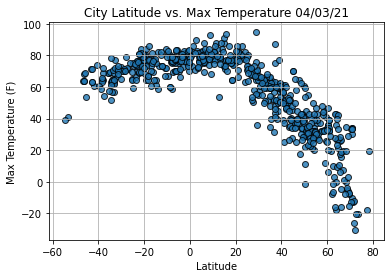

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

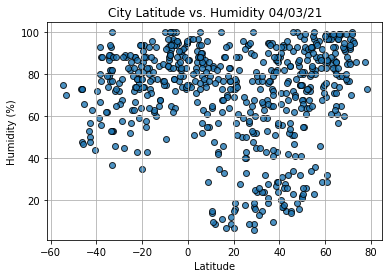

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

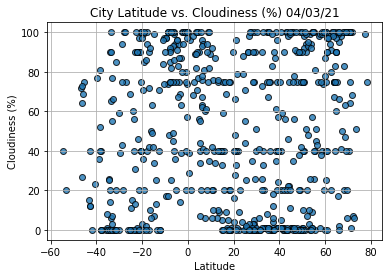

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

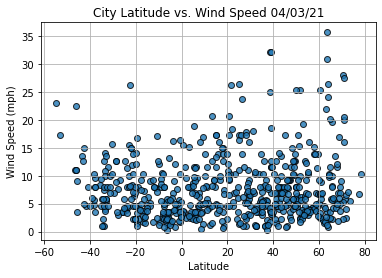

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [39]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-04-03 23:07:47
Lat                      -46.1927
Lng                       168.864
Max Temp                       64
Humidity                       73
Cloudiness                     27
Wind Speed                  11.01
Name: 13, dtype: object

In [40]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beringovskiy,RU,2021-04-03 23:07:43,63.0500,179.3167,3.11,85,100,21.99
3,Pangnirtung,CA,2021-04-03 23:07:44,66.1451,-65.7125,-4.34,79,2,5.75
4,Albany,US,2021-04-03 23:07:23,42.6001,-73.9662,50.00,28,56,5.21
6,Dingle,PH,2021-04-03 23:07:45,10.9995,122.6711,78.15,84,76,7.99
7,Fort Nelson,CA,2021-04-03 23:07:45,58.8053,-122.7002,44.60,29,40,6.91


In [41]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

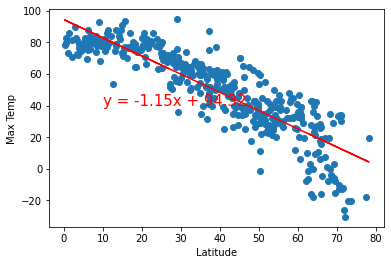

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

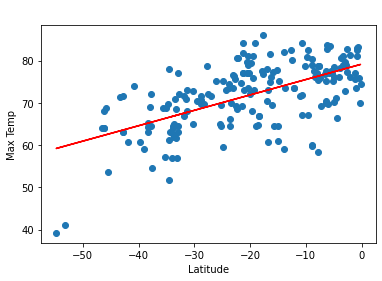

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

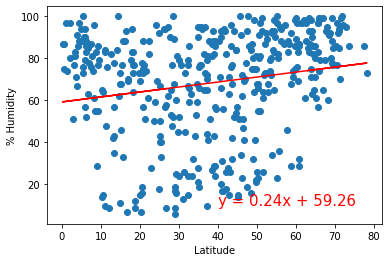

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

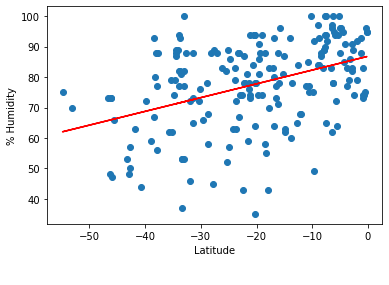

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

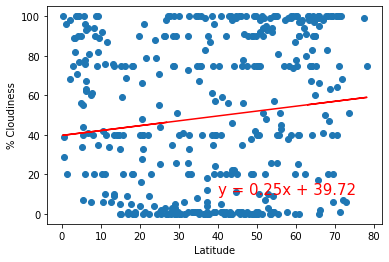

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

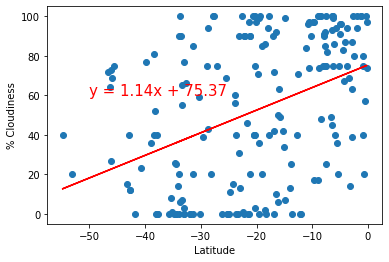

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

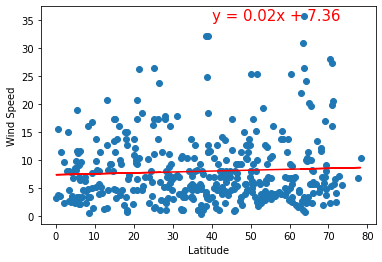

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

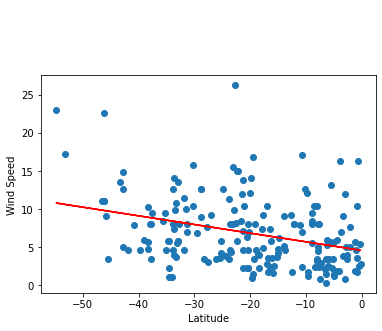

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))